<a href="https://colab.research.google.com/github/DarkOugi/trening_data_scienHS/blob/student/BD_and_AI_%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%966_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B2%D0%B0%D0%BC%D0%B8_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация данных средствами Python

In [ ]:
# скачиваем файл
!wget --no-check-certificate 'https://cde.osu.ru/pdc/marketing_eng.csv' -O marketing_eng.csv

--2020-11-11 04:08:14--  https://cde.osu.ru/pdc/marketing_eng.csv
Resolving cde.osu.ru (cde.osu.ru)... 62.76.152.211
Connecting to cde.osu.ru (cde.osu.ru)|62.76.152.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2556850 (2.4M) [text/csv]
Saving to: ‘marketing_eng.csv’

marketing_eng.csv   100%[===================>]   2.44M   679KB/s    in 4.9s    

2020-11-11 04:08:20 (506 KB/s) - ‘marketing_eng.csv’ saved [2556850/2556850]



## 1. Визуализация данных средствами Pandas

In [ ]:
# отключим предупреждения 
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'png' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('marketing_eng.csv')

Прежде чем мы перейдем к рассмотрению методов библиотек seaborn и plotly, обсудим самый простой и зачастую удобный способ визуализировать данные из pandas dataframe — это воспользоваться функцией plot. 

Для примера построим график дохода в зависимости от возраста. Для начала отфильтруем только нужные нам столбцы, затем посчитаем средний доход по возрасту и у получившегося dataframe вызовем функцию plot без параметров.

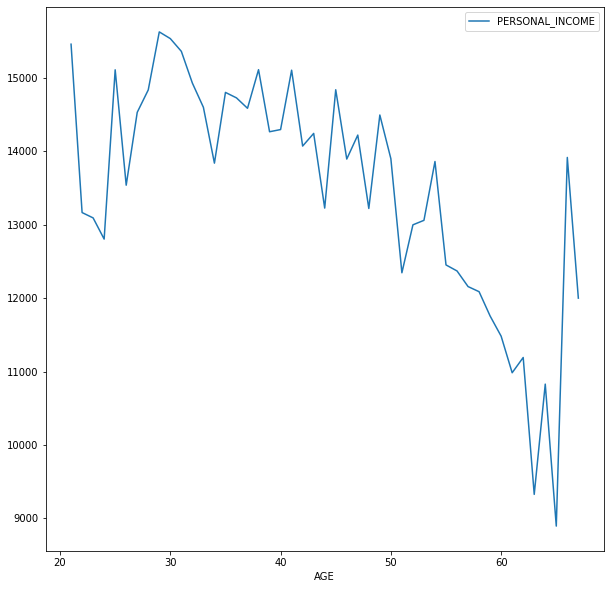

In [ ]:
df[['PERSONAL_INCOME', 'AGE']].groupby('AGE').mean().plot();

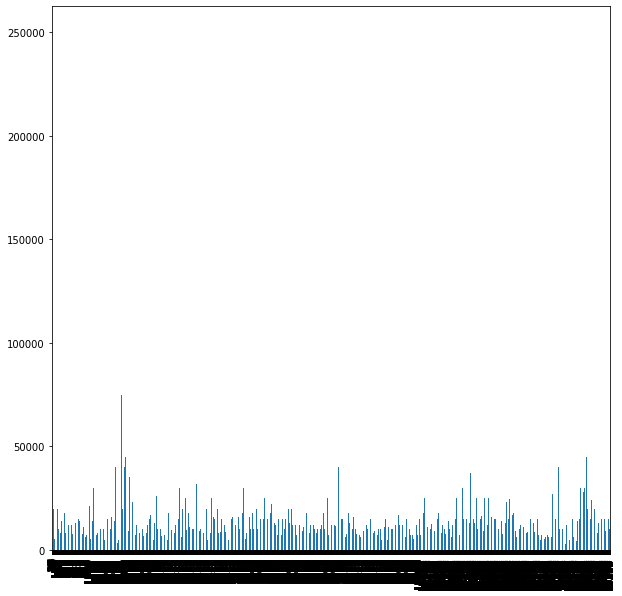

In [ ]:
df['PERSONAL_INCOME'].plot(kind='bar')

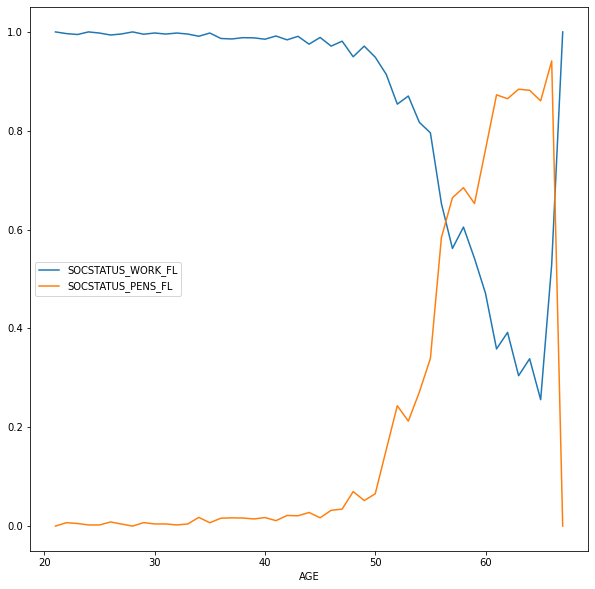

In [ ]:
df[[x for x in df.columns if 'SOCSTATUS' in x] + ['AGE']].groupby('AGE').mean().plot();

C помощью параметра kind можно изменить тип графика, например, на bar chart.

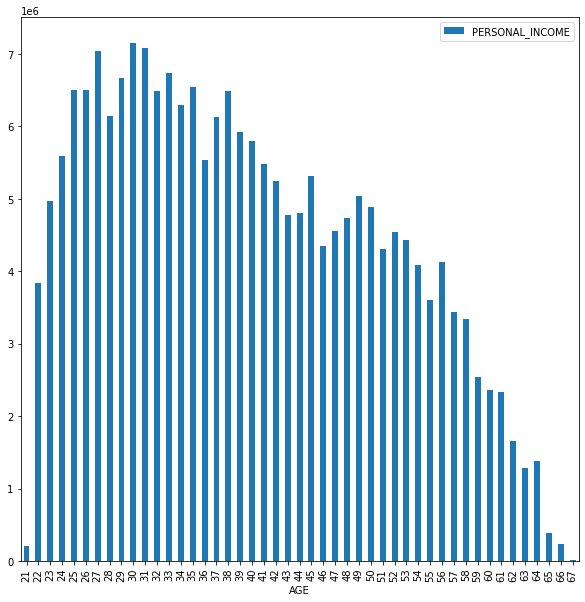

In [ ]:
df[['PERSONAL_INCOME', 'AGE']].groupby('AGE').sum().plot(kind='bar');

## 2. Визуализация средствами Seaborn

Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки

In [ ]:
df.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,EDUCATION,MARITAL_STATUS,ORG_TP_STATE,JOB_DIR,PERSONAL_INCOME,OWN_AUTO,WORK_TIME,LOAN_MAX_DLQ_AMT
0,0,49,1,0,1,Среднее специальное,Состою в браке,Частная компания,Вспомогательный техперсонал,5000.0,0,18.0,1580.0
1,0,32,1,0,1,Среднее,Состою в браке,Индивидуальный предприниматель,Участие в основ. деятельности,12000.0,0,97.0,4020.0
2,0,52,1,0,1,Неполное среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,9000.0,0,84.0,0.0
3,0,39,1,0,1,Высшее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,25000.0,0,168.0,1590.0
4,0,30,1,0,0,Среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,12000.0,0,101.0,2230.0


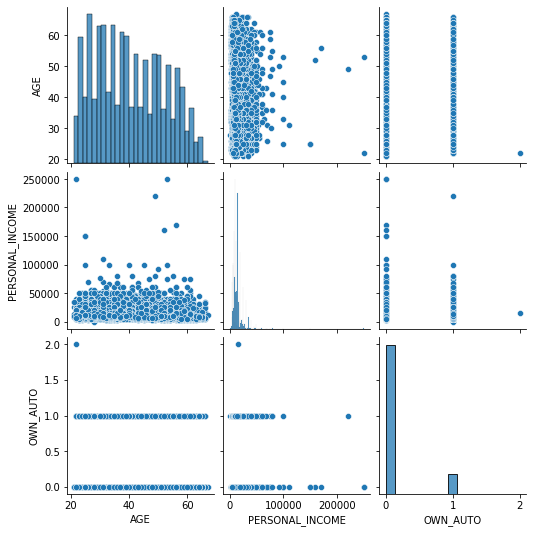

In [ ]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 

sns.pairplot(df[['AGE', 'PERSONAL_INCOME', 'OWN_AUTO']]);

Также с помощью seaborn можно построить распределение

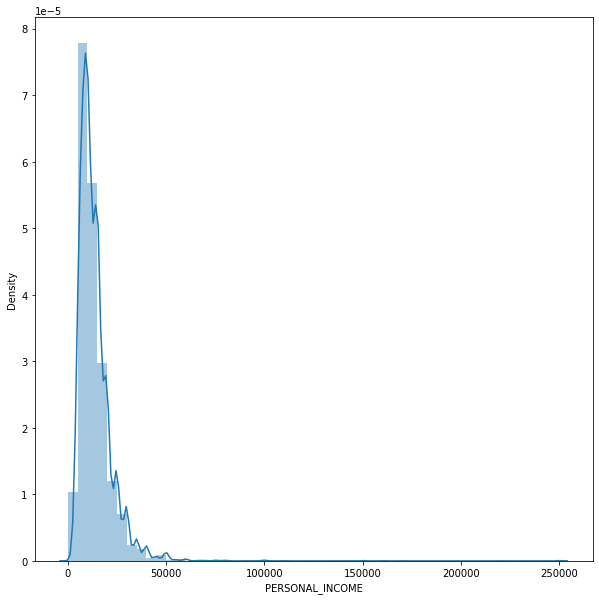

In [ ]:
%config InlineBackend.figure_format = 'png' 
sns.distplot(df.PERSONAL_INCOME);

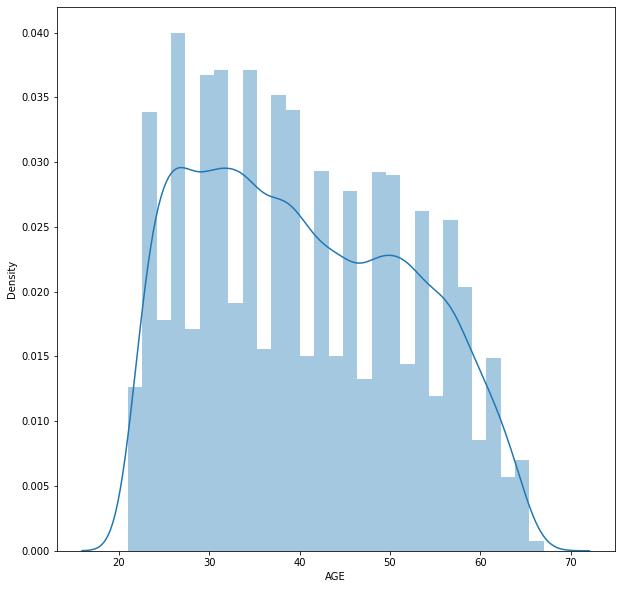

In [ ]:
%config InlineBackend.figure_format = 'png' 
sns.distplot(df['AGE']);

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint_plot – это гибрид scatter plot и histogram (отображаются также гистограммы распределений признаков)

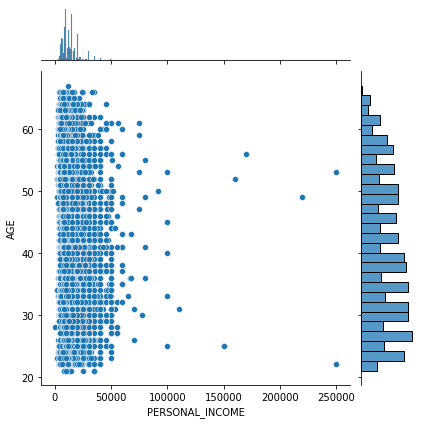

In [ ]:
sns.jointplot(x='PERSONAL_INCOME', y='AGE', 
              data=df, kind='scatter');

Еще один полезный тип графиков – это box plot. Давайте сравним как доход связан с образованием

Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. 

Коробка показывает квантильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) процентили. 

Черта внутри коробки обозначает медиану распределения. 

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения статистически значимой выборки.

Точками на графике обозначаются выбросы (outliers) - те значения, которые не вписываются в промежуток значений, заданный усами графика.

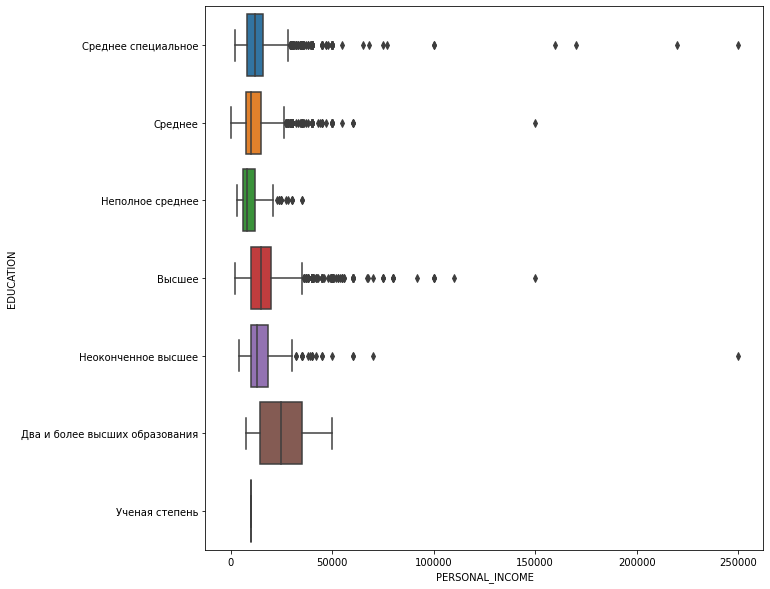

In [ ]:
sns.boxplot(y="EDUCATION", x="PERSONAL_INCOME", data=df, orient="h");

Еще одна полезная визуализация - это **heat map**.

Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным.

In [ ]:
pivot = df.pivot_table(['AGE','WORK_TIME','PERSONAL_INCOME'], ['OWN_AUTO', 'GENDER'], aggfunc='mean')

In [ ]:
pivot  = df.pivot_table(
                        index='OWN_AUTO', 
                        columns='GENDER', 
                        values='PERSONAL_INCOME', 
                        aggfunc=np.max).fillna(0).applymap(float)

In [ ]:
pivot

GENDER,0,1
OWN_AUTO,,
0,250000.0,170000.0
1,220000.0,100000.0
2,15000.0,0.0


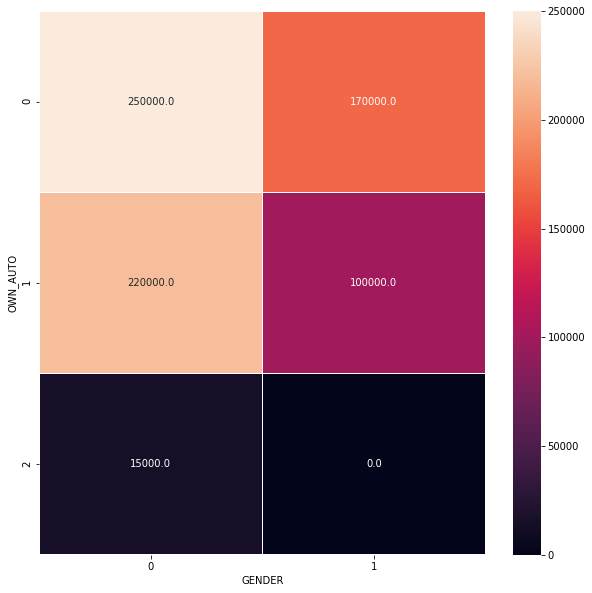

In [ ]:
sns.heatmap(pivot, annot=True, fmt=".1f", linewidths=.5);

## 3. Визуализация средствами Plotly

Plotly - это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook

Перед началом работы импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode.

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [ ]:
dynamic = df[['PERSONAL_INCOME', 'AGE']].groupby('AGE').mean()

In [ ]:
dynamic

,PERSONAL_INCOME
AGE,
21,15461.538462
22,13166.527397
23,13093.815789
24,12805.034325
25,15112.325581
26,13539.687500
27,14532.863918
28,14838.463768
29,15628.992974


In [ ]:
trace0 = go.Scatter(
    x=dynamic.index,
    y=dynamic.PERSONAL_INCOME,
    name='PERSONAL_INCOME by AGE'
)

In [ ]:
data = [trace0]
layout = {'title': 'PERSONAL_INCOME by AGE'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

NameError: ignored

In [ ]:
#экспорт графиков в локальный html
plotly.offline.plot(fig, filename='export_income.html', show_link=False);

In [ ]:
data = []

for edu_level in df.EDUCATION.unique():
    data.append(
        go.Box(y=df[df.EDUCATION==edu_level].PERSONAL_INCOME, name=edu_level)
    )

In [ ]:
iplot(data, show_link = False)

## 4. Виды визуальной аналитики 

### 4.1 Одномерный анализ данных 

#### 4.1.1. Количественные данные

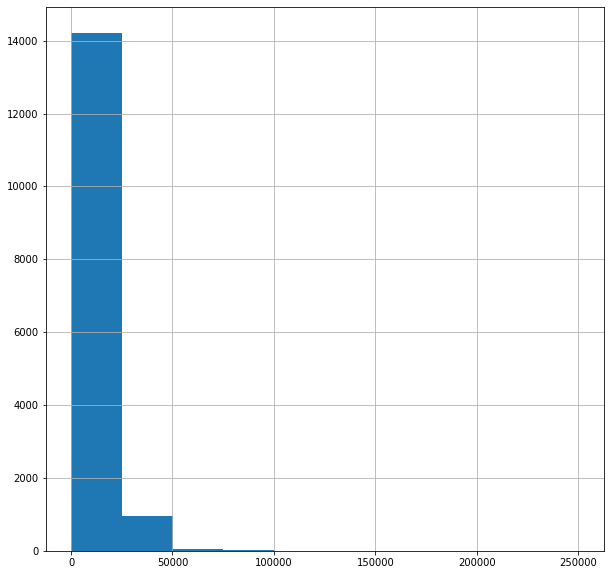

In [ ]:
df['PERSONAL_INCOME'].hist();

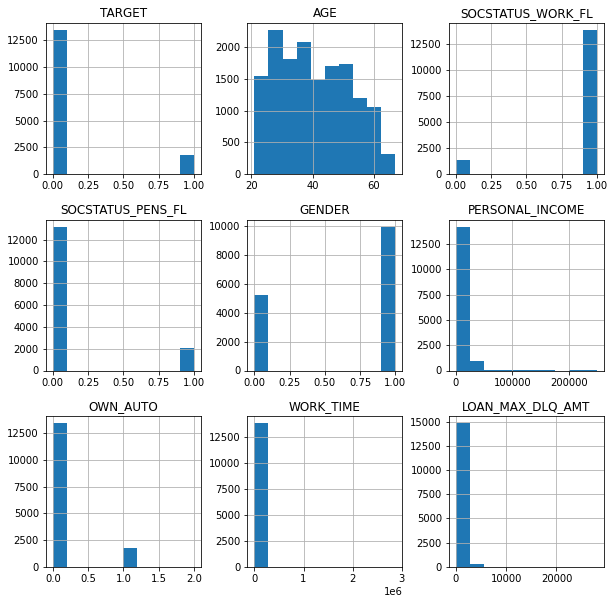

In [ ]:
df.hist();

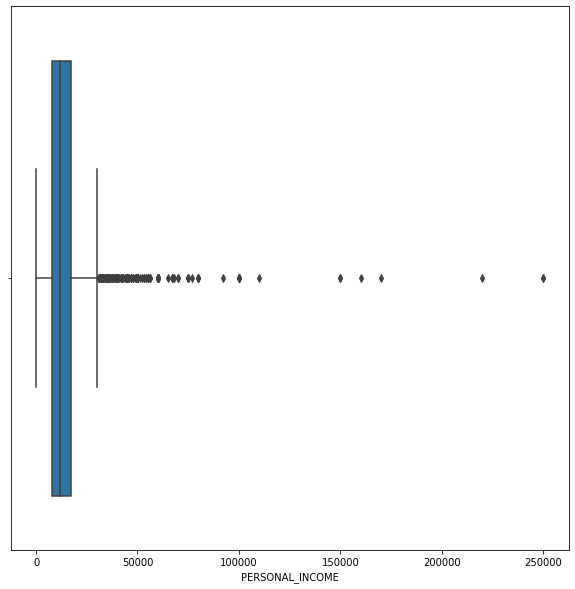

In [ ]:
sns.boxplot(df['PERSONAL_INCOME']);

#### 4.1.2. Категориальные данные

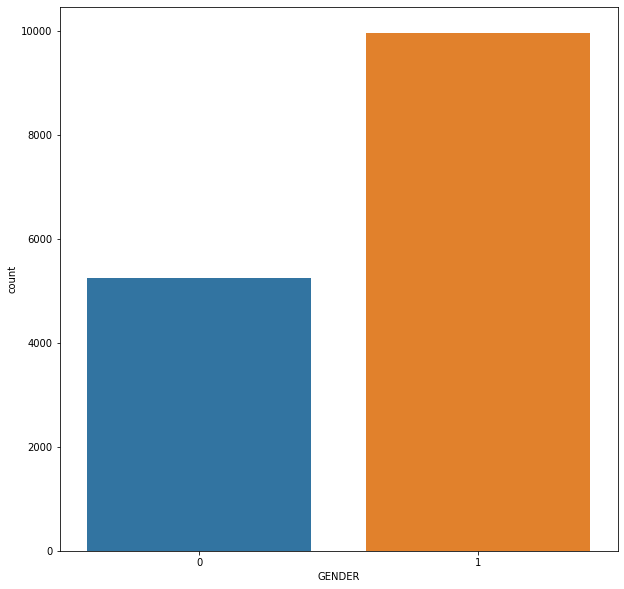

In [ ]:
sns.countplot(df['GENDER']);

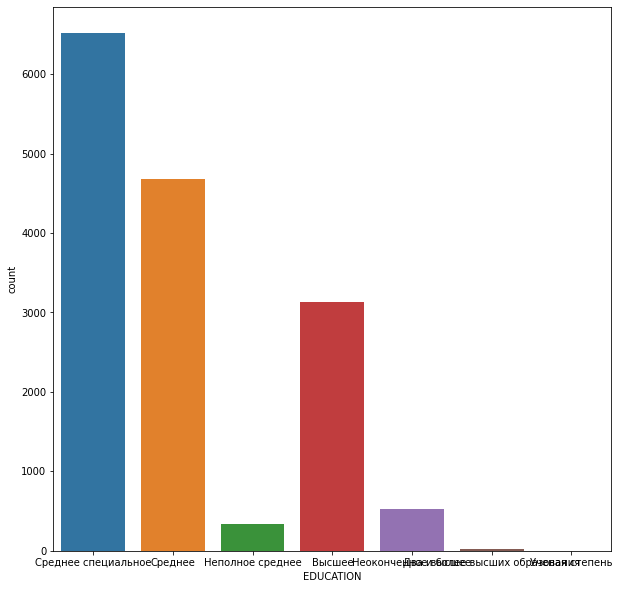

In [ ]:
sns.countplot(df['EDUCATION'], orient='h');

### 4.2. Взаимодействия признаков

#### 4.2.1 Количественные

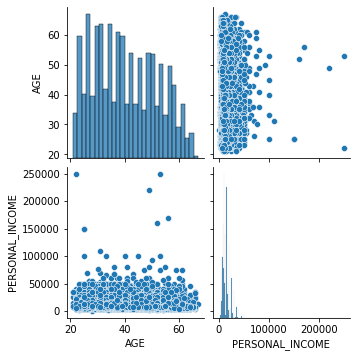

In [ ]:
sns.pairplot(df[['AGE', 'PERSONAL_INCOME']]);

In [ ]:
df.corr()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,PERSONAL_INCOME,OWN_AUTO,WORK_TIME,LOAN_MAX_DLQ_AMT
TARGET,1.000000,-0.103868,0.078377,-0.084826,-0.030723,0.094575,0.020990,-0.003571,0.074993
AGE,-0.103868,1.000000,-0.453267,0.561319,0.142442,-0.089942,-0.057506,-0.009221,-0.038172
SOCSTATUS_WORK_FL,0.078377,-0.453267,1.000000,-0.799768,-0.102309,0.197759,0.072891,0.000157,0.036375
SOCSTATUS_PENS_FL,-0.084826,0.561319,-0.799768,1.000000,0.132074,-0.139629,-0.079307,-0.001280,-0.028261
GENDER,-0.030723,0.142442,-0.102309,0.132074,1.000000,-0.238123,-0.267468,0.006748,0.007424
PERSONAL_INCOME,0.094575,-0.089942,0.197759,-0.139629,-0.238123,1.000000,0.178726,-0.004964,0.075450
OWN_AUTO,0.020990,-0.057506,0.072891,-0.079307,-0.267468,0.178726,1.000000,-0.003259,0.017782
WORK_TIME,-0.003571,-0.009221,0.000157,-0.001280,0.006748,-0.004964,-0.003259,1.000000,-0.002591
LOAN_MAX_DLQ_AMT,0.074993,-0.038172,0.036375,-0.028261,0.007424,0.075450,0.017782,-0.002591,1.000000


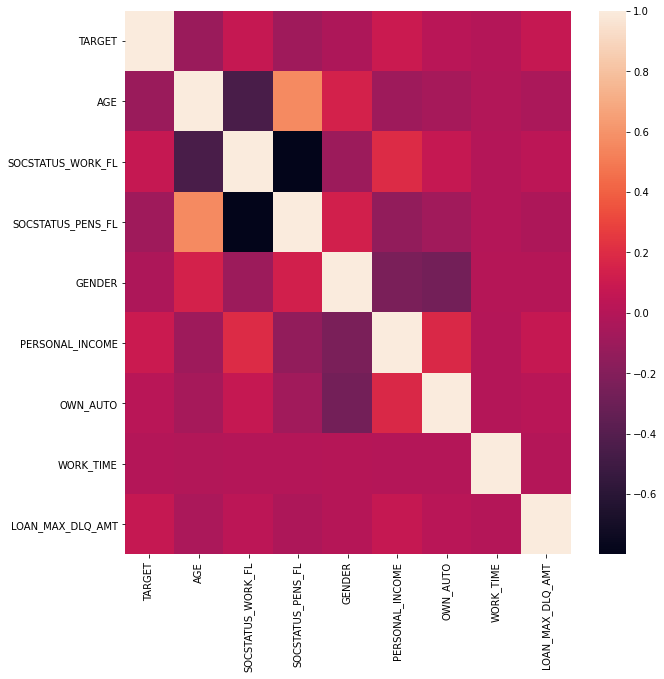

In [ ]:
sns.heatmap(df.corr());


#### 4.2.2 Категориальные

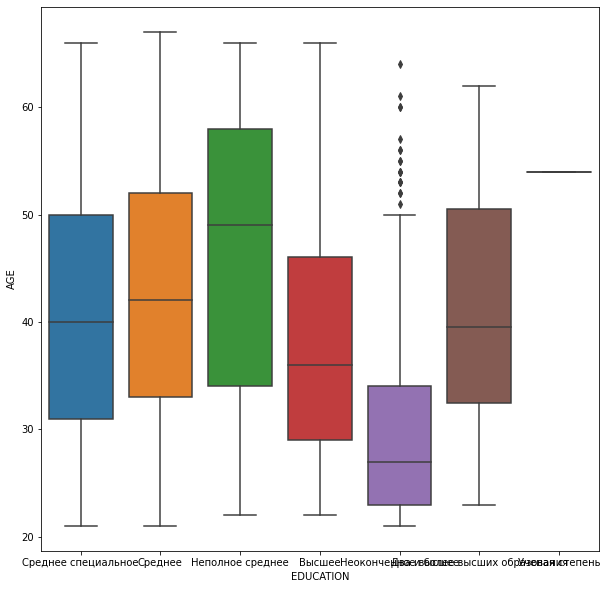

In [ ]:
sns.boxplot(x='EDUCATION', y='AGE', data=df);

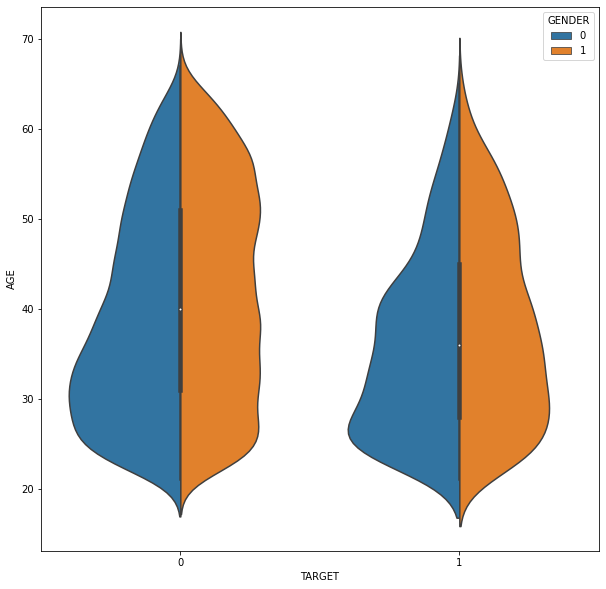

In [ ]:
sns.violinplot(x='TARGET', y='AGE', hue='GENDER', data=df, split=True);

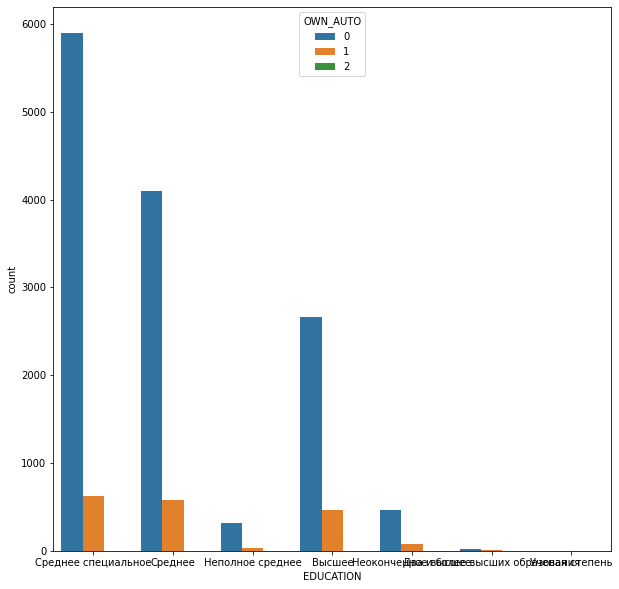

In [ ]:
sns.countplot(x='EDUCATION', hue='OWN_AUTO', data=df);